<a href="https://colab.research.google.com/github/rogeriodelphi/trader_esportivo_analises/blob/main/analises_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [10]:
# df1 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2021/D1.csv')
# df2 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2122/D2.csv')
# df3 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2223/D1.csv')
# df = [df1, df2, df3]
# df = pd.concat(df)


# Baixando a planilha do Football Data
df1 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2021/E0.csv')
df2 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2122/E0.csv')
df = [df1, df2]
df = pd.concat(df)


# Resumo:
- 'H' = Home - Casa,
- 'D' = Draw = Empate,
- 'A' = Away = Fora,

- 'Stakes' = Apostas, 
- 'Date' = Data,
- 'HomeTeam' = Time da casa ,
- 'AwayTeam' = Time visitante,
- 'B365H' = odds mandante,
- 'B365D' = odds empate,
- 'B365A' = odds visitante,
- 'FTHG' = Gols Home - mandante,
- 'FTAG' = Gols Away - visitante,
- 'FTR' =  Resultado Final. 

In [11]:
# Selecionando as Colunas que serão utilizadas
df = df[['Date','HomeTeam','AwayTeam','B365H','B365D','B365A','FTHG','FTAG','FTR']]

# Renomenando as Colunas
df.columns = ['Date','Home','Away','OddsHome','OddsDraw','OddsAway','HomeGoals','AwayGoals','Result']

In [5]:
# Visualizando o DataFrame
# df

In [12]:
# Ajustando o Índice
df.reset_index(inplace=True, drop=True)
df.index = df.index.set_names(['Nº do Jogo'])
df = df.rename(index=lambda x: x + 1)

In [7]:
# Visualizando o Data Frame
#df

In [13]:
# Perdas e Lucros - Back Linear
win_Back_H = 1 * df.OddsHome - 1
win_Back_D = 1 * df.OddsDraw - 1
win_Back_A = 1 * df.OddsAway - 1
lose = -1

# Cria 3 colunas - vão receber o valor do resultado da aposta de acordo com resultado que foi passado
df['Back_H'] = win_Back_H.where(df.Result == 'H', other=lose) # Se Reultado for igual a H, caso contrário recebe -1
df['Back_D'] = win_Back_D.where(df.Result == 'D', other=lose) # Se Reultado for igual a D, caso contrário recebe -1
df['Back_A'] = win_Back_A.where(df.Result == 'A', other=lose) # Se Reultado for igual a E, caso contrário recebe -1

- comando cumsum  = soma acumalada
- comando plot = vai plotar o Data Frame

<Axes: title={'center': 'Back Home'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

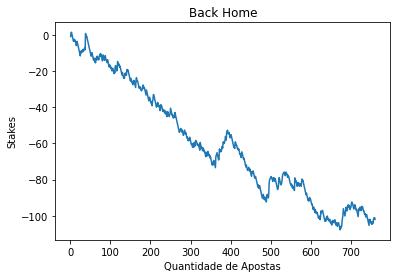

In [16]:
# Back Home
df['BackHome_acu'] = df.Back_H.cumsum()
df.BackHome_acu.plot(title='Back Home', xlabel='Quantidade de Apostas', ylabel='Stakes')

<Axes: title={'center': 'Back Draw'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

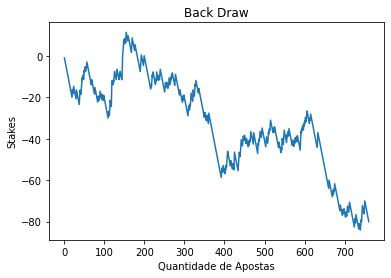

In [17]:
# Back Draw
df['BackDraw_acu'] = df.Back_D.cumsum()
df.BackDraw_acu.plot(title='Back Draw', xlabel='Quantidade de Apostas', ylabel='Stakes')

<Axes: title={'center': 'Back Away'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

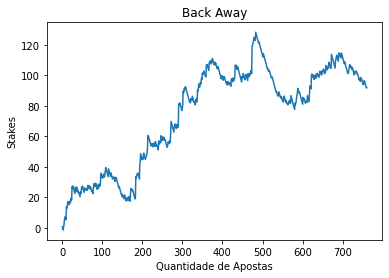

In [18]:
# Back Away
df['BackAway_acu'] = df.Back_A.cumsum()
df.BackAway_acu.plot(title='Back Away', xlabel='Quantidade de Apostas', ylabel='Stakes')